In [1]:
import os
os.environ['SPS_HOME'] = '/Users/annalena/Documents/GitHub/fsps'

In [2]:
# NBVAL_SKIP
from rubix.spectra.ssp.grid import HDF5SSPGrid
from rubix.utils import get_config

config = get_config("../rubix/config/rubix_config.yml")

ssp_bc = HDF5SSPGrid.from_file(config["ssp"]["templates"]["BruzualCharlot2003"], file_location="../rubix/spectra/ssp/templates")

2025-02-04 14:48:34,823 - rubix - INFO - 
   ___  __  _____  _____  __
  / _ \/ / / / _ )/  _/ |/_/
 / , _/ /_/ / _  |/ /_>  <
/_/|_|\____/____/___/_/|_|


2025-02-04 14:48:34,824 - rubix - INFO - Rubix version: 0.0.post366+g4480c14


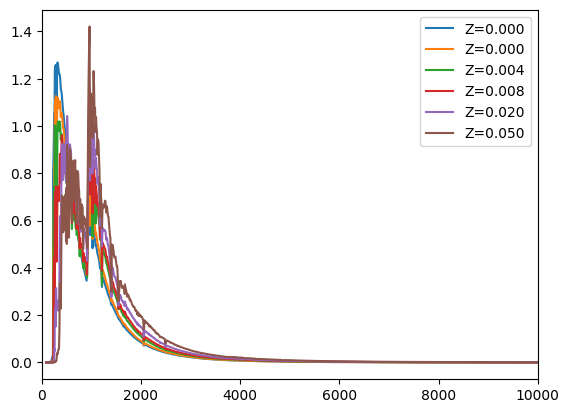

In [6]:
import matplotlib.pyplot as plt

# NBVAL_SKIP
for i in range(len(ssp_bc.metallicity)):
    plt.plot(ssp_bc.wavelength,ssp_bc.flux[i][0], label=r'Z=%0.3f'%ssp_bc.metallicity[i])
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(0,10000)
plt.legend()

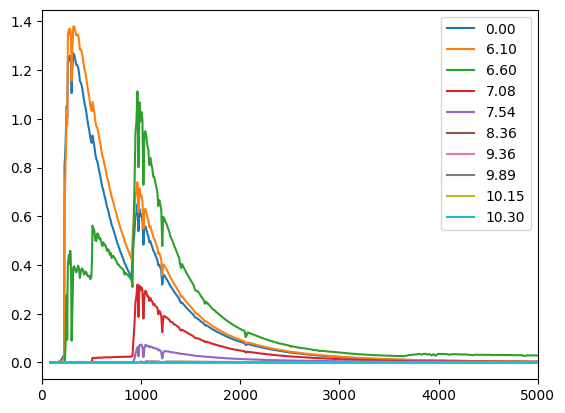

In [10]:
import numpy as np
ages = np.linspace(0,len(ssp_bc.age),10)
for age in ages:
    plt.plot(ssp_bc.wavelength,ssp_bc.flux[0][int(age)], label='%.2f'%ssp_bc.age[int(age)])
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(0,5000)
plt.legend()

In [12]:
# NBVAL_SKIP
from rubix.spectra.ssp.grid import pyPipe3DSSPGrid
ssp_mastar = pyPipe3DSSPGrid.from_file(config["ssp"]["templates"]["Mastar_CB19_SLOG_1_5"], file_location="../rubix/spectra/ssp/templates")

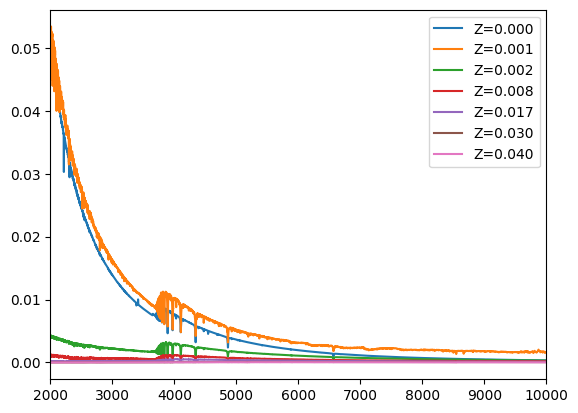

In [13]:
# NBVAL_SKIP
for i in range(len(ssp_mastar.metallicity)):
    plt.plot(ssp_mastar.wavelength,ssp_mastar.flux[i][0], label=r'Z=%0.3f'%ssp_mastar.metallicity[i])
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(2000,10000)
plt.legend()

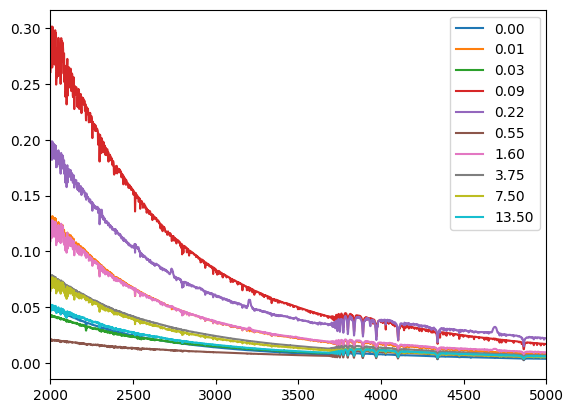

In [15]:
ages = np.linspace(0,len(ssp_mastar.age),10)
for age in ages:
    plt.plot(ssp_mastar.wavelength,ssp_mastar.flux[0][int(age)], label='%.2f'%(ssp_mastar.age[int(age)]))
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(2000,5000)
plt.legend()

In [17]:
from rubix.spectra.ssp.factory import get_ssp_template
ssp_fsps = get_ssp_template("FSPS")

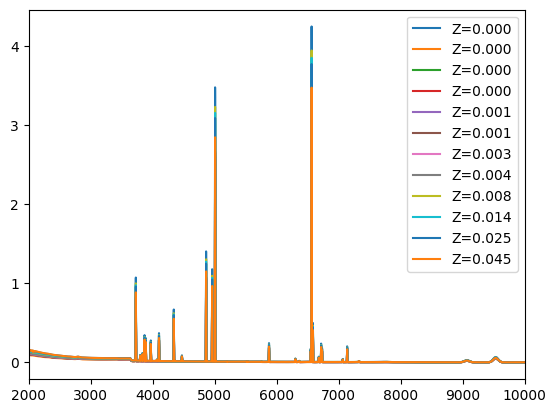

In [19]:
# NBVAL_SKIP
for i in range(len(ssp_fsps.metallicity)):
    plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[i][0], label=r'Z=%0.3f'%ssp_fsps.metallicity[i])
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(2000,10000)
plt.legend()

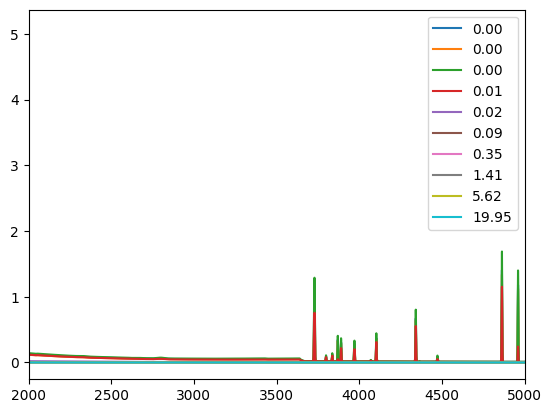

In [20]:
ages = np.linspace(0,len(ssp_fsps.age),10)
for age in ages:
    plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[0][int(age)], label='%.2f'%(ssp_fsps.age[int(age)]))
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(2000,5000)
plt.legend()

In [53]:
print(ssp_bc.age[180])
print(ssp_mastar.age[36])
print(ssp_fsps.age[100])

10.0
10.25
10.0


In [25]:
print(ssp_bc.metallicity[3])
print(ssp_mastar.metallicity[3])
print(ssp_fsps.metallicity[8])

0.008
0.008
0.007985248


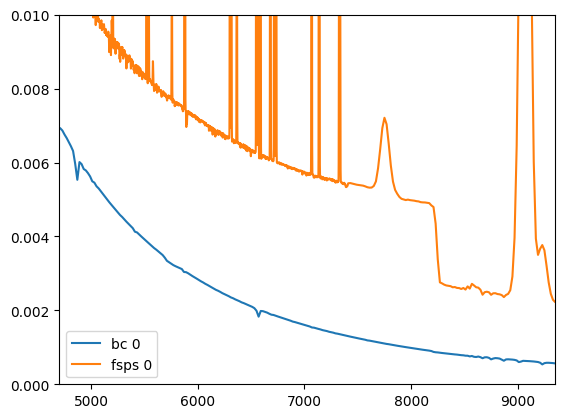

In [ ]:
plt.plot(ssp_bc.wavelength,ssp_bc.flux[3][180], label='bc')
#plt.plot(ssp_mastar.wavelength,ssp_mastar.flux[3][36], label='mastar')
plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[8][100], label='fsps')

#plt.plot(ssp_bc.wavelength,ssp_bc.flux[3][0], label='bc 0')
#plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[8][0], label='fsps 0')

plt.xlim(4700.15, 9351.4)
plt.ylim(0, 0.01)
plt.legend()